In [1]:
# Data Analytics Assignment 8
# Name : Khushi Saxena
# Student ID : 202151078

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
data = pd.read_csv('/Users/yashsingh/Desktop/Data Analytics and Visualization/Week 8/weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


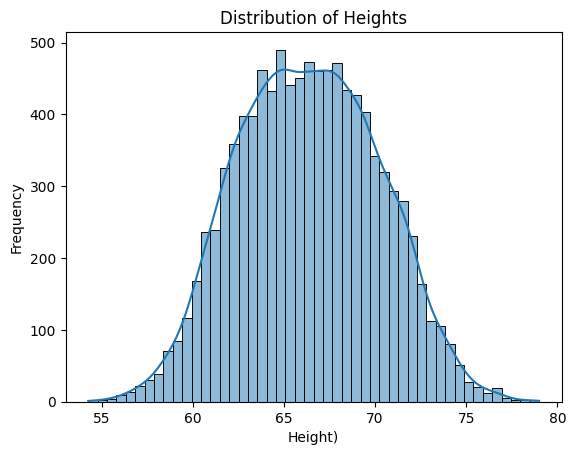

Mean 66.36755975482124
Standard deviation  3.84733573955754


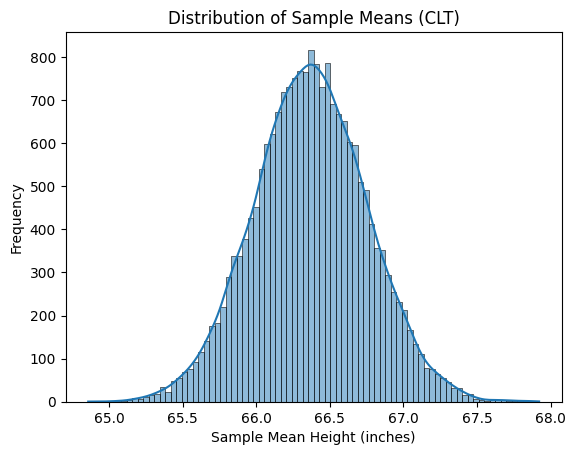

In [3]:
#Question 1
heights = data['Height']

sns.histplot(heights, kde=True)
plt.title('Distribution of Heights')
plt.xlabel('Height)')
plt.ylabel('Frequency')
plt.show()

mean_height = np.mean(heights)
std_height = np.std(heights)

print("Mean", mean_height)
print("Standard deviation ", std_height)

# Generate random samples
sample_means = []
num_samples = 20000
sample_size = 100

for _ in range(num_samples):
    sample = np.random.choice(heights, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Plot
sns.histplot(sample_means, kde=True)
plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Sample Mean Height (inches)')
plt.ylabel('Frequency')
plt.show()

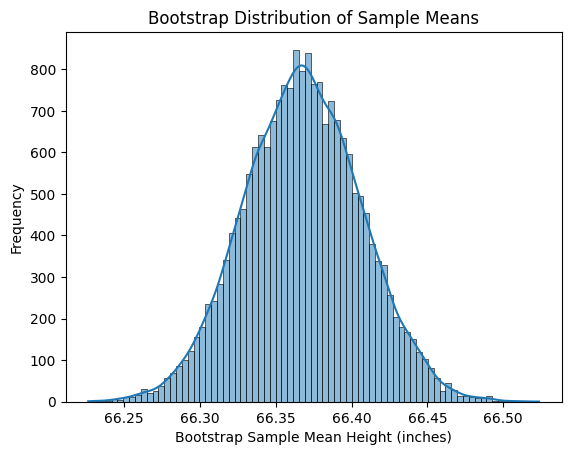

In [4]:
#Question 2
#to perform bootstrap
def bootstrap(data, num_iterations=20000):
    bootstrap_means = []
    for _ in range(num_iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    return bootstrap_means

bootstrap_means = bootstrap(heights)

# Plot
sns.histplot(bootstrap_means, kde=True)
plt.title('Bootstrap Distribution of Sample Means')
plt.xlabel('Bootstrap Sample Mean Height (inches)')
plt.ylabel('Frequency')
plt.show()


95% Confidence Interval : [66.29258179 66.44392399]


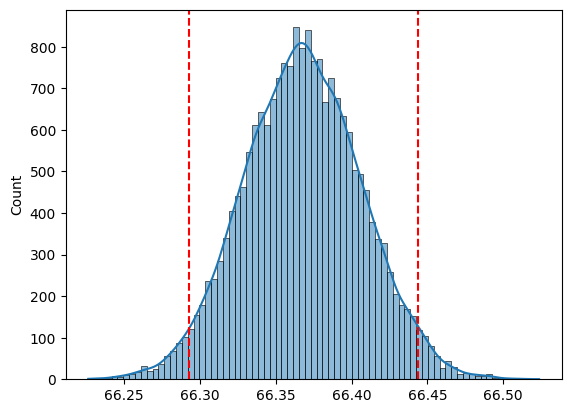

In [5]:
#Question 3
# the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print("95% Confidence Interval :", confidence_interval)

# Plot
sns.histplot(bootstrap_means, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='95% CI Upper Bound')
plt.show()